# Campionamento di Funzione D'Onda Quantistica con l'Algoritmo di Metropolis

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

| Wavefunction | Uniform dr | Gaussian dr|
| :---          |:----:|:---: |
| Ground State  | 1.0  | 0.8  |
| Excited State | 2.5  | 1.7 |

### Stato Fondamentale

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

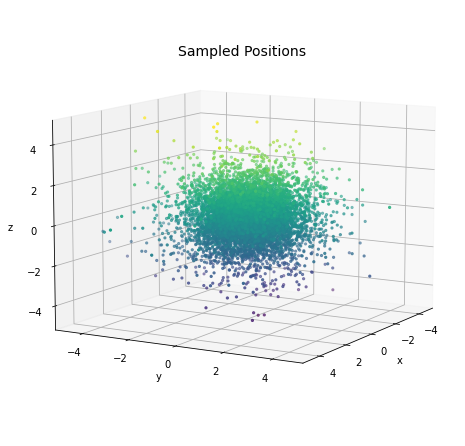

In [56]:
# 3D View
datafile = "./data/gs/gaussian/positions.dat"
# datafile = "./data/gs/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
N = 10000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
lim = 5
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)
plt.title("Sampled Positions", y=0.95, fontsize=14)
plt.show()

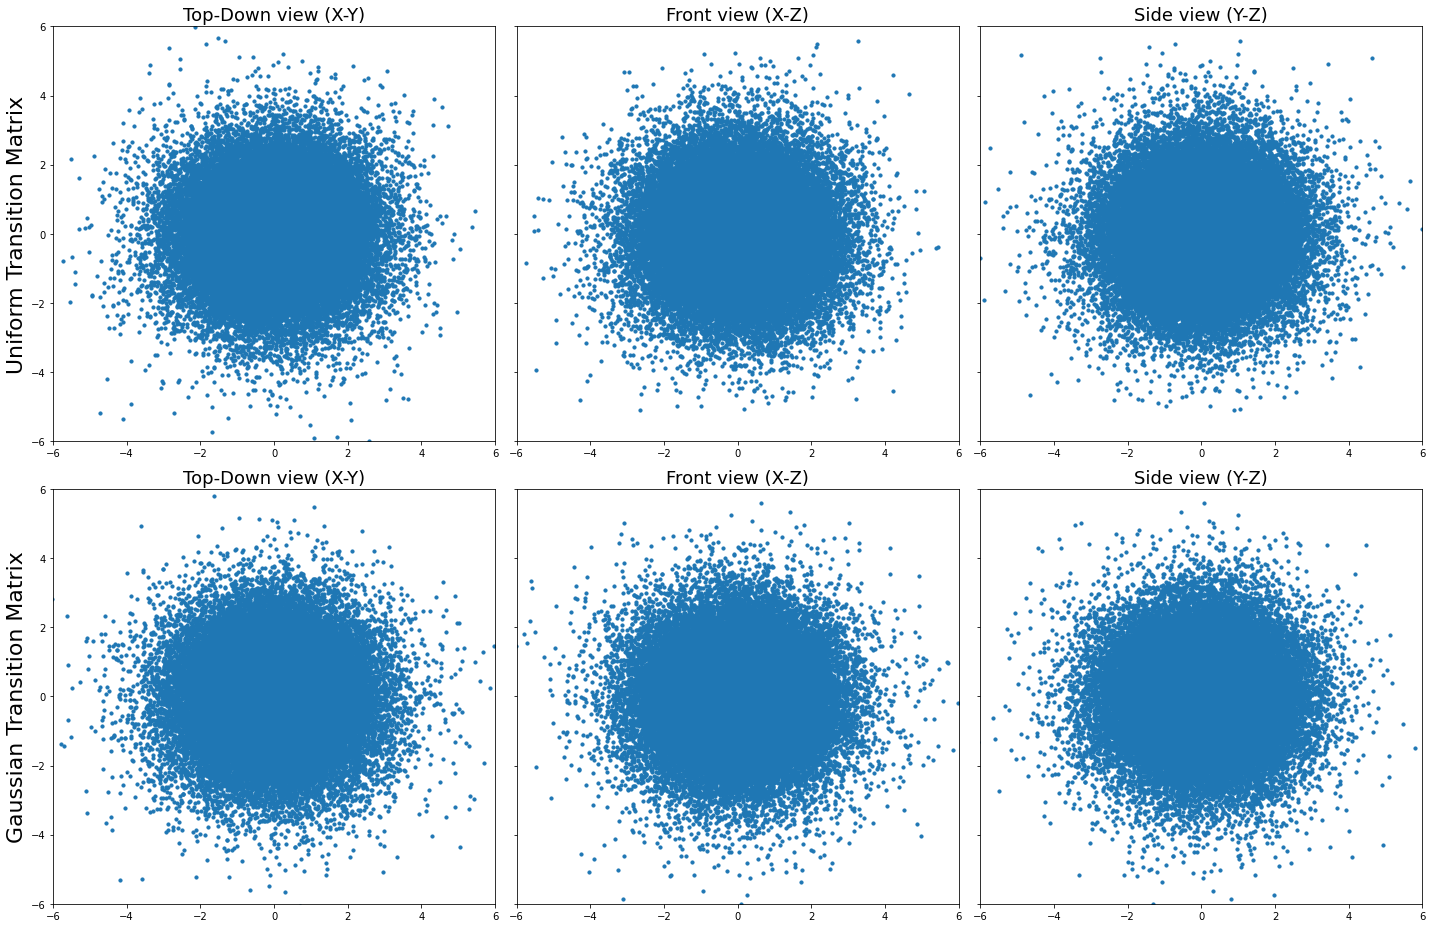

In [39]:
# 2D Views

fig, ax = plt.subplots(2, 3, figsize=(20, 13), sharey=True)

matplotlib.rcParams['axes.titlesize'] = 18

ms = 10
lim = 6

# Uniform

datafile = "./data/gs/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack=True)

ax[0, 0].set_ylabel("Uniform Transition Matrix", fontsize=22)

ax[0, 0].scatter(X, Y, ms)
ax[0, 0].title.set_text("Top-Down view (X-Y)")
ax[0, 0].set_xlim(-lim, lim)
ax[0, 0].set_ylim(-lim, lim)

ax[0, 1].scatter(X, Z, ms)
ax[0, 1].title.set_text("Front view (X-Z)")
ax[0, 1].set_xlim(-lim, lim)
ax[0, 1].set_ylim(-lim, lim)

ax[0, 2].scatter(Y, Z, ms)
ax[0, 2].title.set_text("Side view (Y-Z)")
ax[0, 2].set_xlim(-lim, lim)
ax[0, 2].set_ylim(-lim, lim)

# Gaussian
datafile = "./data/gs/gaussian/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack=True)

ax[1, 0].set_ylabel("Gaussian Transition Matrix", fontsize=22)

ax[1, 0].scatter(X, Y, ms)
ax[1, 0].title.set_text("Top-Down view (X-Y)")
ax[1, 0].set_xlim(-lim, lim)
ax[1, 0].set_ylim(-lim, lim)

ax[1, 1].scatter(X, Z, ms)
ax[1, 1].title.set_text("Front view (X-Z)")
ax[1, 1].set_xlim(-lim, lim)
ax[1, 1].set_ylim(-lim, lim)

ax[1, 2].scatter(Y, Z, ms)
ax[1, 2].title.set_text("Side view (Y-Z)")
ax[1, 2].set_xlim(-lim, lim)
ax[1, 2].set_ylim(-lim, lim)

plt.tight_layout()
plt.show()

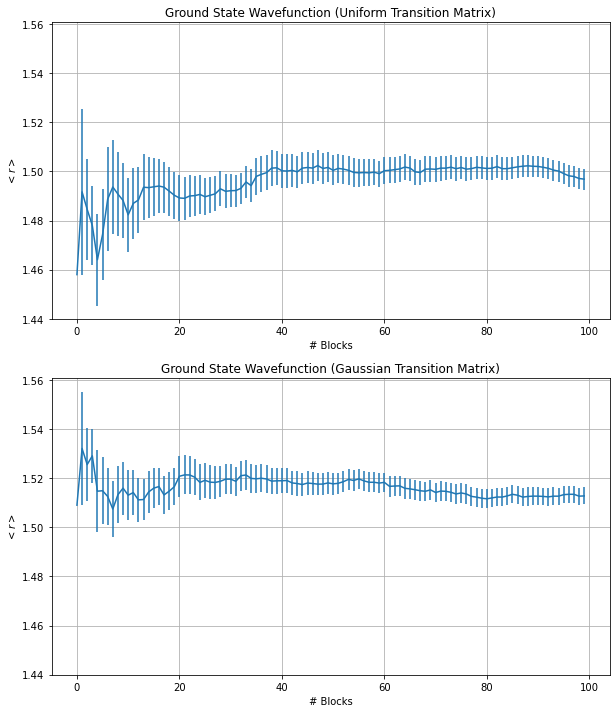

In [43]:
# Average Position

fig, ax = plt.subplots(2,1, figsize=(10, 12), sharey=True)
matplotlib.rcParams['axes.titlesize'] = 12

datafile = "./data/gs/uniform/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
ax[0].grid(True)
ax[0].errorbar(x, avg, yerr=err)
ax[0].set_xlabel('# Blocks')
ax[0].set_ylabel('$<r>$')
ax[0].title.set_text('Ground State Wavefunction (Uniform Transition Matrix)')

datafile = "./data/gs/gaussian/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
ax[1].grid(True)
ax[1].errorbar(x, avg, yerr=err)
ax[1].set_xlabel('# Blocks')
ax[1].set_ylabel('$<r>$')
ax[1].title.set_text('Ground State Wavefunction (Gaussian Transition Matrix)')

plt.show()

### Stato Eccitato 

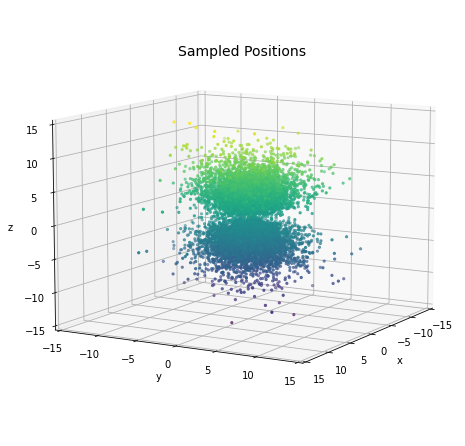

In [60]:
# 3D View
datafile = "./data/es/gaussian/positions.dat"
# datafile = "./data/es/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
N = 10000
ax.scatter(X[0:N], Y[0:N], Z[0:N], c=Z[0:N], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
lim = 15
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim, lim)
ax.set_zlim3d(-lim, lim)
ax.view_init(10, 30)
plt.title("Sampled Positions", y=0.95, fontsize=14)
plt.show()

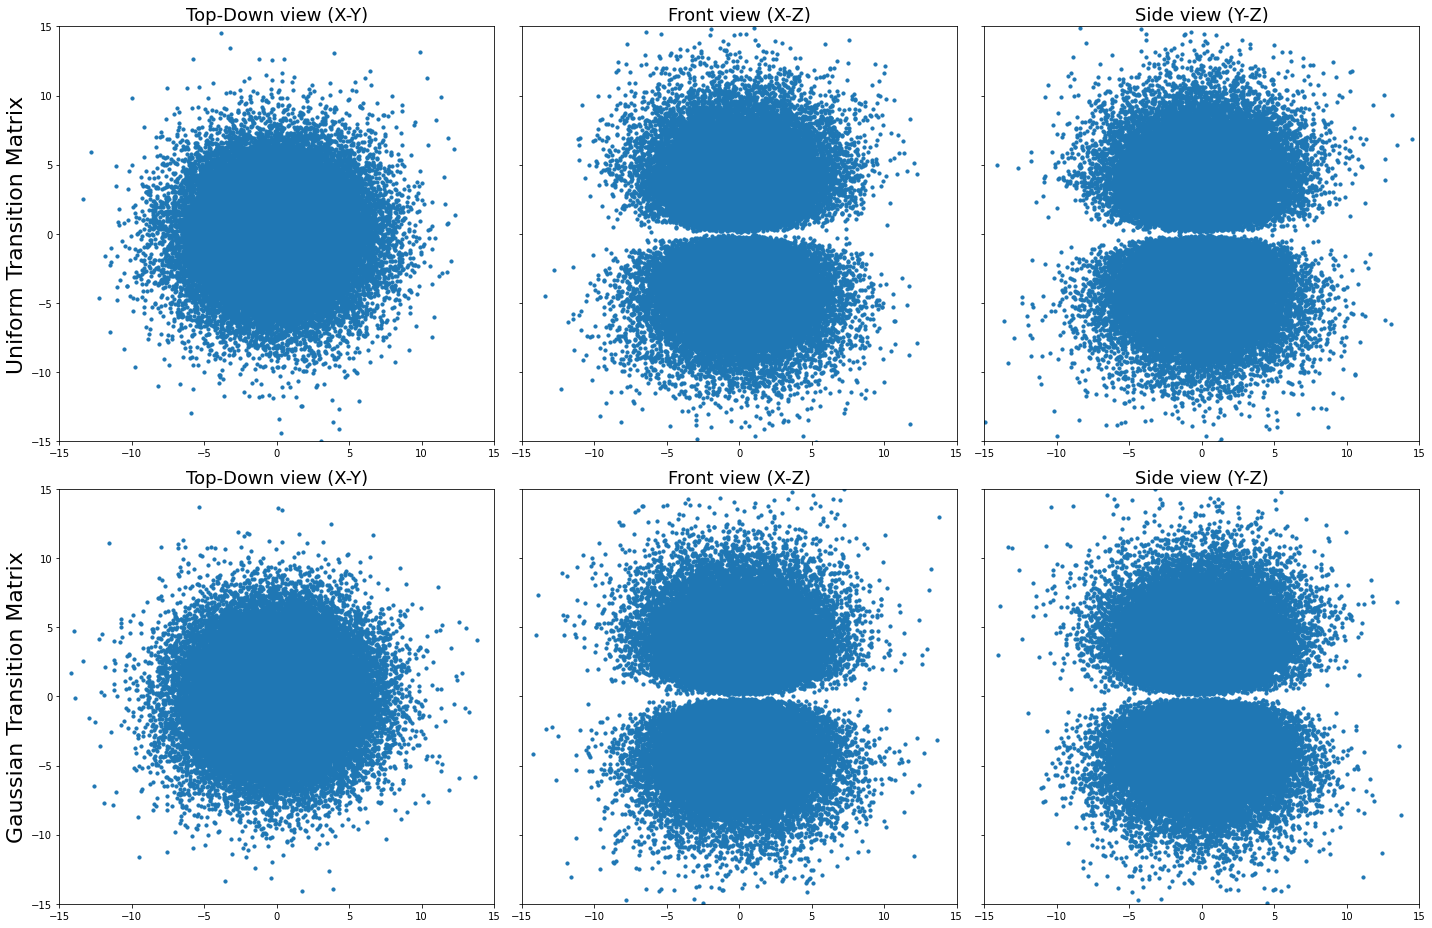

In [63]:
# 2D Views

fig, ax = plt.subplots(2, 3, figsize=(20, 13), sharey=True)

matplotlib.rcParams['axes.titlesize'] = 18

ms = 10
lim = 15

# Uniform

datafile = "./data/es/uniform/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack=True)

ax[0, 0].set_ylabel("Uniform Transition Matrix", fontsize=22)

ax[0, 0].scatter(X, Y, ms)
ax[0, 0].title.set_text("Top-Down view (X-Y)")
ax[0, 0].set_xlim(-lim, lim)
ax[0, 0].set_ylim(-lim, lim)

ax[0, 1].scatter(X, Z, ms)
ax[0, 1].title.set_text("Front view (X-Z)")
ax[0, 1].set_xlim(-lim, lim)
ax[0, 1].set_ylim(-lim, lim)

ax[0, 2].scatter(Y, Z, ms)
ax[0, 2].title.set_text("Side view (Y-Z)")
ax[0, 2].set_xlim(-lim, lim)
ax[0, 2].set_ylim(-lim, lim)

# Gaussian
datafile = "./data/es/gaussian/positions.dat"
X, Y, Z = np.loadtxt(datafile, usecols=(0, 1, 2), delimiter=' ', unpack=True)

ax[1, 0].set_ylabel("Gaussian Transition Matrix", fontsize=22)

ax[1, 0].scatter(X, Y, ms)
ax[1, 0].title.set_text("Top-Down view (X-Y)")
ax[1, 0].set_xlim(-lim, lim)
ax[1, 0].set_ylim(-lim, lim)

ax[1, 1].scatter(X, Z, ms)
ax[1, 1].title.set_text("Front view (X-Z)")
ax[1, 1].set_xlim(-lim, lim)
ax[1, 1].set_ylim(-lim, lim)

ax[1, 2].scatter(Y, Z, ms)
ax[1, 2].title.set_text("Side view (Y-Z)")
ax[1, 2].set_xlim(-lim, lim)
ax[1, 2].set_ylim(-lim, lim)

plt.tight_layout()
plt.show()

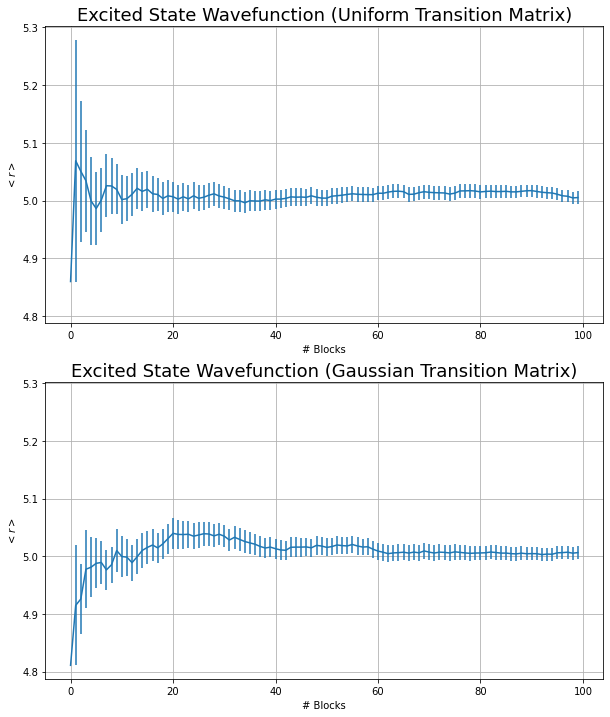

In [64]:
# Average Position

fig, ax = plt.subplots(2,1, figsize=(10, 12), sharey=True)
matplotlib.rcParams['axes.titlesize'] = 12

datafile = "./data/es/uniform/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
ax[0].grid(True)
ax[0].errorbar(x, avg, yerr=err)
ax[0].set_xlabel('# Blocks')
ax[0].set_ylabel('$<r>$')
ax[0].title.set_text('Excited State Wavefunction (Uniform Transition Matrix)')

datafile = "./data/es/gaussian/average_position.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), unpack=True)

N = 100
x = np.arange(N)
ax[1].grid(True)
ax[1].errorbar(x, avg, yerr=err)
ax[1].set_xlabel('# Blocks')
ax[1].set_ylabel('$<r>$')
ax[1].title.set_text('Excited State Wavefunction (Gaussian Transition Matrix)')

plt.show()

### Other Plots